CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import sys,os,os.path
from model import *
from utils import *

CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print (device)

CUDA Available? True
cuda


In [3]:
### this is for running in local ###
try:
    os.environ['HTTP_PROXY']='http://185.46.212.90:80'
    os.environ['HTTPS_PROXY']='http://185.46.212.90:80'
    print ("proxy_exported")
except:
    None

proxy_exported


CODE BLOCK: 3

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=train_transforms)

In [6]:
print (train_data)
print ("*"*50)
print (test_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomApply(
               p=0.1
               CenterCrop(size=(22, 22))
           )
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=warn)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )
**************************************************
Dataset MNIST
    Number of datapoints: 10000
    Root location: ../data
    Split: Test
    StandardTransform
Transform: Compose(
               RandomApply(
               p=0.1
               CenterCrop(size=(22, 22))
           )
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=warn)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
     

CODE BLOCK: 5

In [7]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

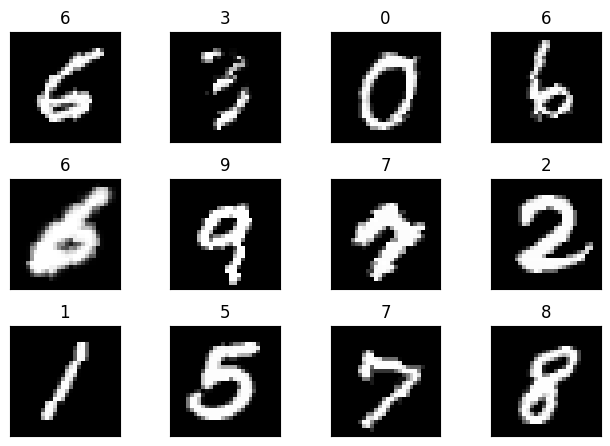

In [8]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

CODE BLOCK: 8

In [9]:
# Data to plot accuracy and loss graphs


test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

CODE BLOCK: 10

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc = train(model, device, train_loader, optimizer, criterion)
  test_acc = test(model, device, train_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.2536 Batch_id=117 Accuracy=66.43: 100% 118/118 [00:08<00:00, 14.61it/s]


Test set: Average loss: 0.2075, Accuracy: 56273/60000 (93.79%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1706 Batch_id=117 Accuracy=95.15: 100% 118/118 [00:07<00:00, 15.80it/s]


Test set: Average loss: 0.1303, Accuracy: 57532/60000 (95.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0964 Batch_id=117 Accuracy=96.70: 100% 118/118 [00:07<00:00, 15.68it/s]


Test set: Average loss: 0.0876, Accuracy: 58393/60000 (97.32%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1110 Batch_id=117 Accuracy=97.31: 100% 118/118 [00:07<00:00, 15.55it/s]


Test set: Average loss: 0.0841, Accuracy: 58424/60000 (97.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0669 Batch_id=117 Accuracy=97.71: 100% 118/118 [00:07<00:00, 15.80it/s]


Test set: Average loss: 0.0646, Accuracy: 58777/60000 (97.96%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0717 Batch_id=117 Accuracy=98.03: 100% 118/118 [00:07<00:00, 15.54it/s]


Test set: Average loss: 0.0568, Accuracy: 58915/60000 (98.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0490 Batch_id=117 Accuracy=98.14: 100% 118/118 [00:07<00:00, 15.76it/s]


Test set: Average loss: 0.0535, Accuracy: 59024/60000 (98.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.2063 Batch_id=117 Accuracy=98.36: 100% 118/118 [00:07<00:00, 15.60it/s]


Test set: Average loss: 0.0487, Accuracy: 59082/60000 (98.47%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.1547 Batch_id=117 Accuracy=98.49: 100% 118/118 [00:07<00:00, 15.51it/s]


Test set: Average loss: 0.0520, Accuracy: 59005/60000 (98.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0823 Batch_id=117 Accuracy=98.53: 100% 118/118 [00:07<00:00, 15.62it/s]


Test set: Average loss: 0.0382, Accuracy: 59286/60000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0054 Batch_id=117 Accuracy=98.67: 100% 118/118 [00:07<00:00, 15.69it/s]


Test set: Average loss: 0.0383, Accuracy: 59266/60000 (98.78%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.1194 Batch_id=117 Accuracy=98.68: 100% 118/118 [00:07<00:00, 15.77it/s]


Test set: Average loss: 0.0416, Accuracy: 59202/60000 (98.67%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0702 Batch_id=13 Accuracy=98.45:  11% 13/118 [00:00<00:06, 15.60it/s]

CODE BLOCK: 11

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))